In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seatsvotes

In [3]:
house = seatsvotes.data.congress(geo=True)
house = house.query('year in (2002,2004,2006,2008)')

In [4]:
house['district_id'] = house.contest_ui.apply(lambda x: x[3:])

In [5]:
house.head()

,index,congress,year,delsouth,state_fips,contest_ui,inc,king_dist,lewis_dist,state_name,turnout,vote_share,geom_uid,geometry,district_id
435,2175,108,2002,1,48,108048018,1,NaN,18,texas,127141.0,0.779929,048108108018,POLYGON ((-95.49837100000001 29.94927400000001...,048018
436,2176,108,2002,1,48,108048024,1,NaN,24,texas,111334.0,0.655703,048108108024,POLYGON ((-97.13458900000001 32.81482900000002...,048024
437,2177,108,2002,1,12,108012021,-1,NaN,21,florida,NaN,0.000000,012108112021,POLYGON ((-80.30847300000001 25.77737699999997...,012021
438,2178,108,2002,1,48,108048030,1,NaN,30,texas,117961.0,0.754317,048108108030,"POLYGON ((-97.034086 32.81652900000002, -97.03...",048030
439,2179,108,2002,1,48,108048032,-1,NaN,32,texas,145112.0,0.309320,048108108032,"POLYGON ((-96.844701 32.98756100000001, -96.84...",048032


In [6]:
pan = seatsvotes.Panel(house, covariate_columns=['inc'],
                        weight_column='turnout',
                        uncontested='censor', group_by='state_name',
                        missing='drop')

/home/lw17329/Dropbox/dissert/dev/seatsvotes/seatsvotes/utils.py:143: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')
/home/lw17329/anaconda/envs/ana/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
simulated = pan.simulate_elections(n_sims=1000)

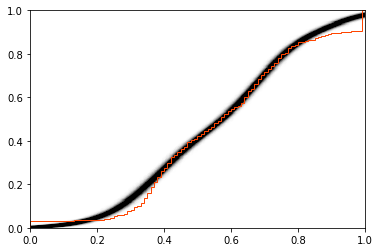

In [13]:
seatsvotes.plot.cdf_shroud(house.query('year == 2008').vote_share.values, 
                           simulated)